## NLP PROJECT #2

### Student: Jefferson Roesler

# 1. Dataset



In [1]:
import json
import pandas as pd

# Load the JSON file
with open('foundationDownload.json', 'r') as file:
    data = json.load(file)

This cell defines a function to extract and preprocess food data. It simplifies the JSON structure by focusing on essential attributes like calories, protein, carbohydrates, fat, and serving size. The output is converted into a Pandas DataFrame for easy data manipulation.

In [2]:
# Extract the list of foods
foods = data["FoundationFoods"]

# Flatten the data and include serving size
def process_food_data_with_serving_size(foods):
    processed_data = []
    for food in foods:
        # Extract food description
        description = food.get("description", "Unknown")

        # Extract serving size (from 'foodPortions')
        food_portions = food.get("foodPortions", [])
        if food_portions:
            # Assume the first portion is the standard serving size
            serving_size = food_portions[0].get("gramWeight", 0)  # Weight in grams
        else:
            serving_size = 0  # Default if no portion info available

        # Extract nutrients
        nutrients = food.get("foodNutrients", [])
        nutrient_dict = {n["nutrient"]["name"]: n["amount"] for n in nutrients if "amount" in n}

        # Keep only key nutrients and serving size
        important_nutrients = {
            "Description": description,
            "Serving Size (g)": serving_size,
            "Calories": nutrient_dict.get("Energy", 0),
            "Protein": nutrient_dict.get("Protein", 0),
            "Carbohydrates": nutrient_dict.get("Carbohydrate, by difference", 0),
            "Fat": nutrient_dict.get("Total lipid (fat)", 0)
        }
        processed_data.append(important_nutrients)

    return processed_data

# Process the food data with serving size
processed_foods_with_serving_size = process_food_data_with_serving_size(foods)

# Convert to a Pandas DataFrame for easier handling
food_df_with_serving_size = pd.DataFrame(processed_foods_with_serving_size)

# Display the first few rows
print(food_df_with_serving_size.head())


                                         Description  Serving Size (g)  \
0                                 Hummus, commercial              33.9   
1                               Tomatoes, grape, raw              49.7   
2  Beans, snap, green, canned, regular pack, drai...             129.0   
3                        Frankfurter, beef, unheated              48.6   
4        Nuts, almonds, dry roasted, with salt added             135.0   

   Calories  Protein  Carbohydrates    Fat  
0     229.0     7.35          14.90  17.10  
1     113.0     0.83           5.51   0.63  
2      86.0     1.04           4.11   0.39  
3    1310.0    11.70           2.89  28.00  
4    2590.0    20.40          16.20  57.80  


In [3]:
# prompt: print all columns

food_df_with_serving_size.columns

Index(['Description', 'Serving Size (g)', 'Calories', 'Protein',
       'Carbohydrates', 'Fat'],
      dtype='object')

### Add columns for calories/protein per gram.


The code below was a older version of this addition.

In [ ]:
# # Add new columns for calories and protein per gram
# food_df_with_serving_size["Calories per Gram"] = food_df_with_serving_size["Calories"] / food_df_with_serving_size["Serving Size (g)"]
# food_df_with_serving_size["Protein per Gram"] = food_df_with_serving_size["Protein"] / food_df_with_serving_size["Serving Size (g)"]

# # Replace infinite or NaN values (e.g., where serving size is 0)
# food_df_with_serving_size.replace([float('inf'), float('-inf')], 0, inplace=True)
# food_df_with_serving_size.fillna(0, inplace=True)

# # Display the updated DataFrame
# print(food_df_with_serving_size.head())


### New Function to add Protein and Calories columns

This cell calculates two derived metrics: Calories per Gram and Protein per Gram. These metrics provide insights into the nutritional density of each food item.

In [ ]:
# Replace zero Serving Size (g) with NaN for proper handling
food_df_with_serving_size["Serving Size (g)"] = food_df_with_serving_size["Serving Size (g)"].replace(0, pd.NA)

# Replace NaN in Serving Size (g) with median or group-based imputed value if not already done
# Example: Global median
median_serving_size = food_df_with_serving_size["Serving Size (g)"].median()
food_df_with_serving_size["Serving Size (g)"].fillna(median_serving_size, inplace=True)

# Recalculate Calories per Gram
food_df_with_serving_size["Calories per Gram"] = food_df_with_serving_size["Calories"] / food_df_with_serving_size["Serving Size (g)"]

# Recalculate Protein per Gram
food_df_with_serving_size["Protein per Gram"] = food_df_with_serving_size["Protein"] / food_df_with_serving_size["Serving Size (g)"]

# Replace infinite or NaN values in the derived columns
food_df_with_serving_size.replace([float('inf'), float('-inf')], 0, inplace=True)
food_df_with_serving_size.fillna(0, inplace=True)

# Display the updated DataFrame
print("Updated DataFrame with recalculated values:")
print(food_df_with_serving_size[["Description", "Serving Size (g)", "Calories per Gram", "Protein per Gram"]].head())


Updated DataFrame with recalculated values:
                                         Description  Serving Size (g)  \
0                                 Hummus, commercial              33.9   
1                               Tomatoes, grape, raw              49.7   
2  Beans, snap, green, canned, regular pack, drai...             129.0   
3                        Frankfurter, beef, unheated              48.6   
4        Nuts, almonds, dry roasted, with salt added             135.0   

   Calories per Gram  Protein per Gram  
0           6.755162          0.216814  
1           2.273642          0.016700  
2           0.666667          0.008062  
3          26.954733          0.240741  
4          19.185185          0.151111  


<ipython-input-4-7b87070c5e2f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df_with_serving_size["Serving Size (g)"].fillna(median_serving_size, inplace=True)
<ipython-input-4-7b87070c5e2f>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  food_df_with_serving_size["Serving Size (g)"].fillna(median_serv

# Preprocessing

## Handling Food Description

Description is too long and has useless info. I want to help the chatbot find later which food the user is talking about.

In [ ]:
# Function to simplify and remove commas in food descriptions
def simplify_description(description):
    # Split by commas and join the first two parts without commas
    parts = description.split(",")
    return " ".join(parts[:2]).strip() if len(parts) > 1 else description.strip()

# Apply the simplification function to the Description column
food_df_with_serving_size["Description"] = food_df_with_serving_size["Description"].apply(simplify_description)

# Display the updated DataFrame
print(food_df_with_serving_size.head())




          Description  Serving Size (g)  Calories  Protein  Carbohydrates  \
0  Hummus  commercial              33.9     229.0     7.35          14.90   
1     Tomatoes  grape              49.7     113.0     0.83           5.51   
2         Beans  snap             129.0      86.0     1.04           4.11   
3   Frankfurter  beef              48.6    1310.0    11.70           2.89   
4       Nuts  almonds             135.0    2590.0    20.40          16.20   

     Fat  Calories per Gram  Protein per Gram  
0  17.10           6.755162          0.216814  
1   0.63           2.273642          0.016700  
2   0.39           0.666667          0.008062  
3  28.00          26.954733          0.240741  
4  57.80          19.185185          0.151111  


In [ ]:
# Display all columns in the DataFrame
print("Columns in the dataset:")
print(food_df_with_serving_size.columns)

# Optionally, display the first few rows to inspect the data
print("\nSample data:")
print(food_df_with_serving_size.head())


Columns in the dataset:
Index(['Description', 'Serving Size (g)', 'Calories', 'Protein',
       'Carbohydrates', 'Fat', 'Calories per Gram', 'Protein per Gram'],
      dtype='object')

Sample data:
          Description  Serving Size (g)  Calories  Protein  Carbohydrates  \
0  Hummus  commercial              33.9     229.0     7.35          14.90   
1     Tomatoes  grape              49.7     113.0     0.83           5.51   
2         Beans  snap             129.0      86.0     1.04           4.11   
3   Frankfurter  beef              48.6    1310.0    11.70           2.89   
4       Nuts  almonds             135.0    2590.0    20.40          16.20   

     Fat  Calories per Gram  Protein per Gram  
0  17.10           6.755162          0.216814  
1   0.63           2.273642          0.016700  
2   0.39           0.666667          0.008062  
3  28.00          26.954733          0.240741  
4  57.80          19.185185          0.151111  


### Results:

Simplified food descriptions by removing unnecessary details, making them easier to understand and process during retrieval and response generation.

## Missing Values

In [ ]:
# Check for missing values
missing_values = food_df_with_serving_size.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(food_df_with_serving_size)) * 100

# Combine into a DataFrame for better readability
missing_summary = pd.DataFrame({
    "Column": food_df_with_serving_size.columns,
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Percentage (%)", ascending=False)

# Display the missing value summary
print(missing_summary)


                              Column  Missing Values  Percentage (%)
Description              Description               0             0.0
Serving Size (g)    Serving Size (g)               0             0.0
Calories                    Calories               0             0.0
Protein                      Protein               0             0.0
Carbohydrates          Carbohydrates               0             0.0
Fat                              Fat               0             0.0
Calories per Gram  Calories per Gram               0             0.0
Protein per Gram    Protein per Gram               0             0.0


No missing values identified.

## Zero Values 

In [ ]:
# Count rows with Serving Size (g) equal to zero
zero_serving_size_count = (food_df_with_serving_size["Serving Size (g)"] == 0).sum()
print(f"Number of foods with zero serving size: {zero_serving_size_count}")


Number of foods with zero serving size: 0


In [ ]:
# Check for zero values in numeric columns
zero_values_summary = (food_df_with_serving_size == 0).sum()

# Calculate the percentage of zero values
zero_values_percentage = (zero_values_summary / len(food_df_with_serving_size)) * 100

# Combine into a DataFrame for readability
zero_summary = pd.DataFrame({
    "Column": food_df_with_serving_size.columns,
    "Zero Values": zero_values_summary,
    "Percentage (%)": zero_values_percentage
}).sort_values(by="Percentage (%)", ascending=False)

# Display the zero value summary
print("Zero Value Summary:")
print(zero_summary)



Zero Value Summary:
                              Column  Zero Values  Percentage (%)
Calories                    Calories          219       69.303797
Calories per Gram  Calories per Gram          219       69.303797
Carbohydrates          Carbohydrates           59       18.670886
Protein                      Protein           14        4.430380
Protein per Gram    Protein per Gram           14        4.430380
Fat                              Fat           10        3.164557
Description              Description            0        0.000000
Serving Size (g)    Serving Size (g)            0        0.000000


## Handling Calories Column = zero

In [ ]:
# Filter rows where Calories is equal to zero
zero_calories_rows = food_df_with_serving_size[food_df_with_serving_size["Calories"] == 0]

# Display the rows with zero Calories
print("Rows with zero Calories:")
print(zero_calories_rows)


Rows with zero Calories:
              Description  Serving Size (g)  Calories  Protein  Carbohydrates  \
61            Salt  table               6.1       0.0     0.00            0.0   
74             Beans  Dry              97.3       0.0    25.50            0.0   
75             Beans  Dry              97.3       0.0    21.30            0.0   
76             Beans  Dry              97.3       0.0    23.30            0.0   
77             Beans  Dry              97.3       0.0    25.60            0.0   
..                    ...               ...       ...      ...            ...   
311   Sorghum bran  white              97.3       0.0    11.20           68.7   
312  Sorghum flour  white              97.3       0.0    10.20           73.5   
313  Sorghum grain  white              97.3       0.0    10.20           74.9   
314  Sorghum  whole grain              97.3       0.0    10.10           73.6   
315   Plantains  overripe              97.3       0.0     1.17           29.2   

  

In [ ]:
# Display the first 10 rows with zero Calories
print(zero_calories_rows.head(10))

# Optionally, export the filtered rows to a CSV for analysis
zero_calories_rows.to_csv("zero_calories_rows.csv", index=False)


    Description  Serving Size (g)  Calories  Protein  Carbohydrates   Fat  \
61  Salt  table               6.1       0.0      0.0            0.0  0.00   
74   Beans  Dry              97.3       0.0     25.5            0.0  1.04   
75   Beans  Dry              97.3       0.0     21.3            0.0  1.16   
76   Beans  Dry              97.3       0.0     23.3            0.0  0.86   
77   Beans  Dry              97.3       0.0     25.6            0.0  1.12   
78   Beans  Dry              97.3       0.0     26.8            0.0  1.14   
79   Beans  Dry              97.3       0.0     24.6            0.0  1.28   
80   Beans  Dry              97.3       0.0     25.2            0.0  1.44   
81   Beans  Dry              97.3       0.0     24.4            0.0  1.23   
82   Beans  Dry              97.3       0.0     25.0            0.0  1.03   

    Calories per Gram  Protein per Gram  
61                0.0          0.000000  
74                0.0          0.262076  
75                0.0     

1. Validate Zero Calories:
Foods like salt are valid with zero calories, so these can be excluded from further processing.
For the remaining rows, we can estimate calories based on macronutrient values using the standard formula:

Calories
=
4
×

Protein (g)
+
4
×

Carbohydrates (g)
+
9
×
Fat (g)

Calories=4×Protein (g)+4×Carbohydrates (g)+9×Fat (g)

2. Fill Missing Calories:
Replace zero calorie values with the calculated estimates.


In [ ]:
# Identify rows where Calories is zero but Protein, Carbohydrates, or Fat are non-zero
non_salt_rows = food_df_with_serving_size[
    (food_df_with_serving_size["Calories"] == 0) &
    ((food_df_with_serving_size["Protein"] > 0) |
     (food_df_with_serving_size["Carbohydrates"] > 0) |
     (food_df_with_serving_size["Fat"] > 0))
]

# Calculate calories using the macronutrient formula
food_df_with_serving_size.loc[non_salt_rows.index, "Calories"] = (
    4 * food_df_with_serving_size.loc[non_salt_rows.index, "Protein"] +
    4 * food_df_with_serving_size.loc[non_salt_rows.index, "Carbohydrates"] +
    9 * food_df_with_serving_size.loc[non_salt_rows.index, "Fat"]
)

# Recalculate Calories per Gram
food_df_with_serving_size["Calories per Gram"] = (
    food_df_with_serving_size["Calories"] / food_df_with_serving_size["Serving Size (g)"]
)

# Replace infinite or NaN values
food_df_with_serving_size.replace([float('inf'), float('-inf')], 0, inplace=True)
food_df_with_serving_size.fillna(0, inplace=True)

# Display the updated DataFrame
print("Updated rows with previously zero Calories:")
print(food_df_with_serving_size.loc[non_salt_rows.index])


Updated rows with previously zero Calories:
              Description  Serving Size (g)  Calories  Protein  Carbohydrates  \
74             Beans  Dry              97.3    111.36    25.50            0.0   
75             Beans  Dry              97.3     95.64    21.30            0.0   
76             Beans  Dry              97.3    100.94    23.30            0.0   
77             Beans  Dry              97.3    112.48    25.60            0.0   
78             Beans  Dry              97.3    117.46    26.80            0.0   
..                    ...               ...       ...      ...            ...   
311   Sorghum bran  white              97.3    402.94    11.20           68.7   
312  Sorghum flour  white              97.3    363.96    10.20           73.5   
313  Sorghum grain  white              97.3    369.74    10.20           74.9   
314  Sorghum  whole grain              97.3    372.78    10.10           73.6   
315   Plantains  overripe              97.3    130.39     1.17   

In [ ]:
# Filter rows where Protein and Fat are both zero
zero_protein_fat = food_df_with_serving_size[
    (food_df_with_serving_size["Protein"] == 0) &
    (food_df_with_serving_size["Fat"] == 0)
]

# Display these rows for review
print("Rows with zero Protein and zero Fat:")
print(zero_protein_fat)


Rows with zero Protein and zero Fat:
        Description  Serving Size (g)  Calories  Protein  Carbohydrates  Fat  \
61      Salt  table               6.1       0.0      0.0            0.0  0.0   
95      Oil  canola              90.9       0.0      0.0            0.0  0.0   
96        Oil  corn              91.3       0.0      0.0            0.0  0.0   
97     Oil  soybean              91.3       0.0      0.0            0.0  0.0   
98       Oil  olive              90.7       0.0      0.0            0.0  0.0   
126     Oil  peanut              97.3       0.0      0.0            0.0  0.0   
127  Oil  sunflower              97.3       0.0      0.0            0.0  0.0   
128  Oil  safflower              97.3       0.0      0.0            0.0  0.0   
129      Oil  olive              97.3       0.0      0.0            0.0  0.0   

     Calories per Gram  Protein per Gram  
61                 0.0               0.0  
95                 0.0               0.0  
96                 0.0           

## Drop Rows with All Zero Values

In [ ]:
# Drop rows where Protein, Fat, and Calories are all zero
cleaned_df = food_df_with_serving_size[
    ~((food_df_with_serving_size["Protein"] == 0) &
      (food_df_with_serving_size["Fat"] == 0) &
      (food_df_with_serving_size["Calories"] == 0))
]

# Display the number of rows after cleaning
print(f"Number of rows after dropping invalid rows: {len(cleaned_df)}")
print(cleaned_df.head())


Number of rows after dropping invalid rows: 307
          Description  Serving Size (g)  Calories  Protein  Carbohydrates  \
0  Hummus  commercial              33.9     229.0     7.35          14.90   
1     Tomatoes  grape              49.7     113.0     0.83           5.51   
2         Beans  snap             129.0      86.0     1.04           4.11   
3   Frankfurter  beef              48.6    1310.0    11.70           2.89   
4       Nuts  almonds             135.0    2590.0    20.40          16.20   

     Fat  Calories per Gram  Protein per Gram  
0  17.10           6.755162          0.216814  
1   0.63           2.273642          0.016700  
2   0.39           0.666667          0.008062  
3  28.00          26.954733          0.240741  
4  57.80          19.185185          0.151111  


In [ ]:
print(cleaned_df[
    (cleaned_df["Protein"] == 0) &
    (cleaned_df["Fat"] == 0) &
    (cleaned_df["Calories"] == 0)
])


Empty DataFrame
Columns: [Description, Serving Size (g), Calories, Protein, Carbohydrates, Fat, Calories per Gram, Protein per Gram]
Index: []


In [ ]:
print(f"Rows before cleaning: {len(food_df_with_serving_size)}")
print(f"Rows after cleaning: {len(cleaned_df)}")


Rows before cleaning: 316
Rows after cleaning: 307


# Dividing foods in High-Protein, Low-Carb, High-Fat and Balanced.

Categorizes foods based on their macronutrient composition

In [ ]:
# Define thresholds for macronutrient-based categorization
def macronutrient_category(row):
    if row["Protein"] > 15:
        return "High-Protein"
    elif row["Carbohydrates"] < 5:
        return "Low-Carb"
    elif row["Fat"] > 10:
        return "High-Fat"
    else:
        return "Balanced"

# Apply the function to assign macronutrient profiles
food_df_with_serving_size["Macronutrient Profile"] = food_df_with_serving_size.apply(macronutrient_category, axis=1)

# Display a sample of foods with macronutrient profiles
print(food_df_with_serving_size[["Description", "Macronutrient Profile"]].head())


          Description Macronutrient Profile
0  Hummus  commercial              High-Fat
1     Tomatoes  grape              Balanced
2         Beans  snap              Low-Carb
3   Frankfurter  beef              Low-Carb
4       Nuts  almonds          High-Protein


In [ ]:
# prompt: print all columns

food_df_with_serving_size.columns

Index(['Description', 'Serving Size (g)', 'Calories', 'Protein',
       'Carbohydrates', 'Fat', 'Calories per Gram', 'Protein per Gram',
       'Macronutrient Profile'],
      dtype='object')

In [ ]:
import pandas as pd

# Ensure numeric values are rounded for consistency
food_df_with_serving_size["Calories"] = food_df_with_serving_size["Calories"].round(1)
food_df_with_serving_size["Protein"] = food_df_with_serving_size["Protein"].round(1)
food_df_with_serving_size["Carbohydrates"] = food_df_with_serving_size["Carbohydrates"].round(1)
food_df_with_serving_size["Fat"] = food_df_with_serving_size["Fat"].round(1)


## Set Up a Retrieval System

This cell implements a retrieval system for finding foods similar to a user query based on their descriptions. Here's how it works:

Load Sentence Transformer Model:

The SentenceTransformer model all-MiniLM-L6-v2 is loaded. This pre-trained model generates embeddings (dense vector representations) for textual data, enabling semantic similarity searches.
Generate Embeddings for Food Descriptions:

The Description column of the dataset is converted into a list.
The model encodes these descriptions into embeddings, which are stored in description_embeddings. These embeddings capture the semantic meaning of each description.
Define the Retrieval Function:

Input: Takes a query (e.g., "high-protein foods") and the number of top results to retrieve (top_k).
Query Embedding: The input query is encoded into an embedding vector using the same model.
Compute Similarity: Cosine similarity is calculated between the query embedding and all description embeddings using util.pytorch_cos_sim.
Retrieve Top Results: The top k most similar descriptions are identified using torch.topk, and their indices are used to retrieve the corresponding rows from the dataset.
Remove Duplicates: Results are filtered to ensure unique descriptions.
Return Results:

The function returns the top matching foods as a Pandas DataFrame, ready for further use or display.

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# Load a Sentence Transformer model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the food descriptions
food_descriptions = food_df_with_serving_size["Description"].tolist()
description_embeddings = embedding_model.encode(food_descriptions, convert_to_tensor=True)

# Retrieval function
def retrieve_similar_foods(query, top_k=5):
    query_embedding = embedding_model.encode(query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, description_embeddings)
    top_results = torch.topk(scores, k=top_k)
    indices = top_results.indices[0].tolist()
    return food_df_with_serving_size.iloc[indices].drop_duplicates(subset="Description")


This function preprocesses the retrieved food data to create a concise textual context for further use, such as input for a language model.

In [ ]:
def preprocess_context(retrieved_foods):
    context = []
    for _, food in retrieved_foods.iterrows():
        context.append(
            f"{food['Description']}: {food['Calories']} calories, "
            f"{food['Protein']}g protein, {food['Carbohydrates']}g carbs, "
            f"{food['Fat']}g fat."
        )
    return " ".join(context)


## Pre-trained T5 language model to generate natural language responses

This function bridges the gap between structured data retrieval and natural language output. It enables the application to:

* Understand user queries.

* Retrieve relevant foods.

* Provide a concise, context-aware response summarizing nutritional benefits and suggesting how the foods can be incorporated into a diet.

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the T5 model and tokenizer
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Generate a response using T5
def generate_cleaned_t5_response(query, top_k=5):
    retrieved_foods = retrieve_similar_foods(query, top_k=top_k)
    context = preprocess_context(retrieved_foods)

    prompt = (
        f"User asked: {query}. "
        f"The following foods have been identified based on your query: {context}. "
        f"Summarize the nutritional benefits of these foods. Ensure the response is concise, "
        f"avoids repeating items, and suggests how to use these foods in a diet."
    )

    inputs = t5_tokenizer.encode(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = t5_model.generate(
        inputs,
        max_length=150,
        temperature=0.7,
        top_p=0.9,
        do_sample=True
    )
    return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)


This testing loop evaluates the system's ability to:

* Handle diverse and realistic user queries.

* Retrieve relevant foods based on the query.

* Generate coherent, informative, and context-aware responses using the T5 model.

The responses can help assess the quality of retrieval and generation, ensuring the system provides accurate and useful dietary recommendations.

In [ ]:
# Define realistic prompts
realistic_prompts = [
    "What are some high-protein snacks?",
    "Can you suggest foods for a low-carb diet?",
    "What foods are high in calories and protein for bulking?",
    "Suggest a dinner idea with high-protein and low-calorie foods.",
    "What are good vegetarian protein sources?"
]

# Test each prompt
for prompt in realistic_prompts:
    print(f"Prompt: {prompt}")
    response = generate_cleaned_t5_response(prompt, top_k=5)
    print(f"Response:\n{response}\n{'-' * 80}")


Prompt: What are some high-protein snacks?
Response:
Nuts almonds: 625.9 calories, 21.5g protein, 20.0g carbs, 51.1g fat. Nuts brazilnuts: 663.0 calories, 15.0g protein, 21.6g carbs, 57.4g fat.
--------------------------------------------------------------------------------
Prompt: Can you suggest foods for a low-carb diet?
Response:
Milk low fat: 43.0 calories, 3.4g protein, 5.2g carbs, 1.0g fat. Buttermilk low fat: 42.8 calories, 3.5g protein, 4.8g carbs, 1.1g fat. Mango Tommy Atkins: 68.6 calories, 0.6g protein, 15.3g carbs, 0.6g fat.
--------------------------------------------------------------------------------
Prompt: What foods are high in calories and protein for bulking?
Response:
Cream cheese full fat: 342.9 calories, 5.8g protein, 4.6g carbs, 33.5g fat. Cottage cheese full fat: 102.8 calories, 11.6g protein, 4.6g carbs, 4.2g fat. Buttermilk low fat: 42.8 calories, 3.5g protein, 4.8g carbs, 1.1g fat. Oats whole grain: 381.8 calories, 13.5g protein, 68.7g carbs, 5.9g fat..
--

### General Observations

Strengths:

Responses are clear and include detailed nutritional information.
Retrieval correctly identifies some relevant foods.

Weaknesses:

Filtering: Responses often include irrelevant or borderline items (e.g., mango for low-carb).
Repetition: Items are sometimes repeated unnecessarily.
Summarization: Lacks meaningful insights or suggestions.

________________________________________________________________________________

This function improves the accuracy of the retrieval process by integrating domain-specific filters.

It ensures that the results are not only semantically relevant but also aligned with the specific nutritional goals implied by the query.

This refinement is crucial for delivering more targeted and meaningful dietary recommendations.

In [ ]:
def retrieve_similar_foods2(query, top_k=5):
    # Generate query embedding
    query_embedding = embedding_model.encode(query, convert_to_tensor=True)
    # Compute cosine similarity with description embeddings
    scores = util.pytorch_cos_sim(query_embedding, description_embeddings)
    # Retrieve more results (e.g., top 10 instead of top 5)
    top_results = torch.topk(scores, k=top_k)
    indices = top_results.indices[0].tolist()
    retrieved = food_df_with_serving_size.iloc[indices]

    # Apply additional filters based on the query
    if "low-carb" in query.lower():
        retrieved = retrieved[retrieved["Carbohydrates"] < 5]
    elif "high-protein" in query.lower():
        retrieved = retrieved[retrieved["Protein"] > 15]
    elif "bulking" in query.lower():
        retrieved = retrieved[(retrieved["Calories"] > 300) & (retrieved["Protein"] > 10)]
    elif "vegetarian" in query.lower():
        vegetarian_keywords = ["nuts", "seeds", "legumes", "tofu", "quinoa"]
        retrieved = retrieved[retrieved["Description"].str.contains("|".join(vegetarian_keywords), case=False, na=False)]

    return retrieved.drop_duplicates(subset="Description")


This function creates a compact and diverse textual representation of the retrieved foods.

By randomly limiting the number of items, it avoids overwhelming the user with too much information while ensuring the response remains relevant and diverse.

This context is typically passed to a language model for generating natural language responses tailored to the user query.

In [ ]:
def preprocess_context2(retrieved_foods, num_items=3):
    # Limit to a fixed number of random items
    retrieved_foods = retrieved_foods.sample(n=min(num_items, len(retrieved_foods)), random_state=random.randint(1, 100))
    context = []
    for _, food in retrieved_foods.iterrows():
        context.append(
            f"{food['Description']}: {food['Calories']} calories, "
            f"{food['Protein']}g protein, {food['Carbohydrates']}g carbs, "
            f"{food['Fat']}g fat."
        )
    return " ".join(context)


This enhanced function refines the response generation process to:

* Provide more detailed and diverse responses.

* Avoid repetition while ensuring relevance.

* Tried to enhance user experience by explaining how the suggested foods can fit into meals or snacks, but no sucess in this intention.



In [ ]:
def generate_cleaned_t5_response2(query, top_k=5, num_items=3):
    retrieved_foods = retrieve_similar_foods2(query, top_k=top_k)
    context = preprocess_context2(retrieved_foods, num_items=num_items)

    prompt = (
        f"User asked: {query}. "
        f"The following foods have been identified based on your query: {context}. "
        f"Summarize the nutritional benefits of these foods, ensuring the response is diverse and explains how these foods can be used in meals or snacks."
    )

    inputs = t5_tokenizer.encode(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = t5_model.generate(
        inputs,
        max_length=200,  # Allow for more detailed summaries
        temperature=0.8,  # Increase randomness
        top_p=0.85,       # Use a smaller top-p for controlled diversity
        do_sample=True
    )
    return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)



### Testing

In [ ]:
import random

# Realistic prompts for testing
prompts = [
    "What are some high-protein snacks?",
    "Can you suggest foods for a low-carb diet?",
    "What foods are high in calories and protein for bulking?",
    "Suggest a dinner idea with high-protein and low-calorie foods.",
    "What are good vegetarian protein sources?"
]

# Test each prompt with the updated pipeline
for prompt in prompts:
    print(f"Prompt: {prompt}")
    response = generate_cleaned_t5_response2(prompt, top_k=10, num_items=3)
    print(f"Response:\n{response}\n{'-' * 80}")


Prompt: What are some high-protein snacks?
Response:
Using these foods, you can help them plan meals or snacks for your specific needs.
--------------------------------------------------------------------------------
Prompt: Can you suggest foods for a low-carb diet?
Response:
Buttermilk low fat: 42.8 calories, 3.5g protein, 4.8g carbs, 1.1g fat. Buttermilk reduced fat: 50.0 calories, 3.4g protein, 4.9g carbs, 1.9g fat.
--------------------------------------------------------------------------------
Prompt: What foods are high in calories and protein for bulking?
Response:
oats whole grain: 381.8 calories, 13.5g protein, 68.7g carbs, 5.9g fat. Buckwheat whole grain: 356.2 calories, 11.1g protein, 71.1g carbs, 3.0g fat. Nuts hazelnuts or filberts: 641.5 calories, 13.5g protein, 26.5g carbs, 53.5g fat.
--------------------------------------------------------------------------------
Prompt: Suggest a dinner idea with high-protein and low-calorie foods.
Response:
Chicken broilers or fryers

# Conclusion: Key Insights and Outcomes

## Strengths of the System:

* Accurate Retrieval: The retrieval function effectively identifies relevant foods based on the query, leveraging both semantic similarity and domain-specific filtering.

* Flexibility: The system adapts to a variety of dietary needs, such as high-protein, low-carb, vegetarian, or bulking, offering tailored recommendations.

* Diverse Nutritional Details: Responses include detailed nutritional information (calories, protein, carbs, fat) to help users make informed dietary choices.



## Challenges Observed:

* Generic Outputs for Certain Prompts: Some responses, like for "What are some high-protein snacks?" lack specific food suggestions and instead provide generalized guidance.

* Repetition: Similar or redundant foods appear across responses, such as nuts being repeatedly highlighted in different contexts.

* Filtering Limitations: While domain-specific filters improve relevance, some responses still include borderline items that may not fully meet the query's intent (e.g., whole grains in a "bulking" context).



## Overall Performance:

The system performs well in providing relevant suggestions, successfully bridging structured data retrieval.

It demonstrates the capability of combining machine learning-based retrieval systems with LLMs like T5 for meaningful user interactions.


## Future Improvements:

Enhance filtering mechanisms to better align retrieved items with query intents.

Increase diversity and specificity in responses to avoid repetition and ensure broader coverage of the dataset.

Fine-tune the T5 model further for domain-specific prompts to improve output precision and relevance.*

This project successfully showcases how language models and retrieval systems can be combined to address user needs in a practical domain like nutrition, providing a strong foundation for future enhancements.

### * Tried to fine-tune this model generating conversational examples, but without success. The model still responses in the same way.

Below some examples of output:

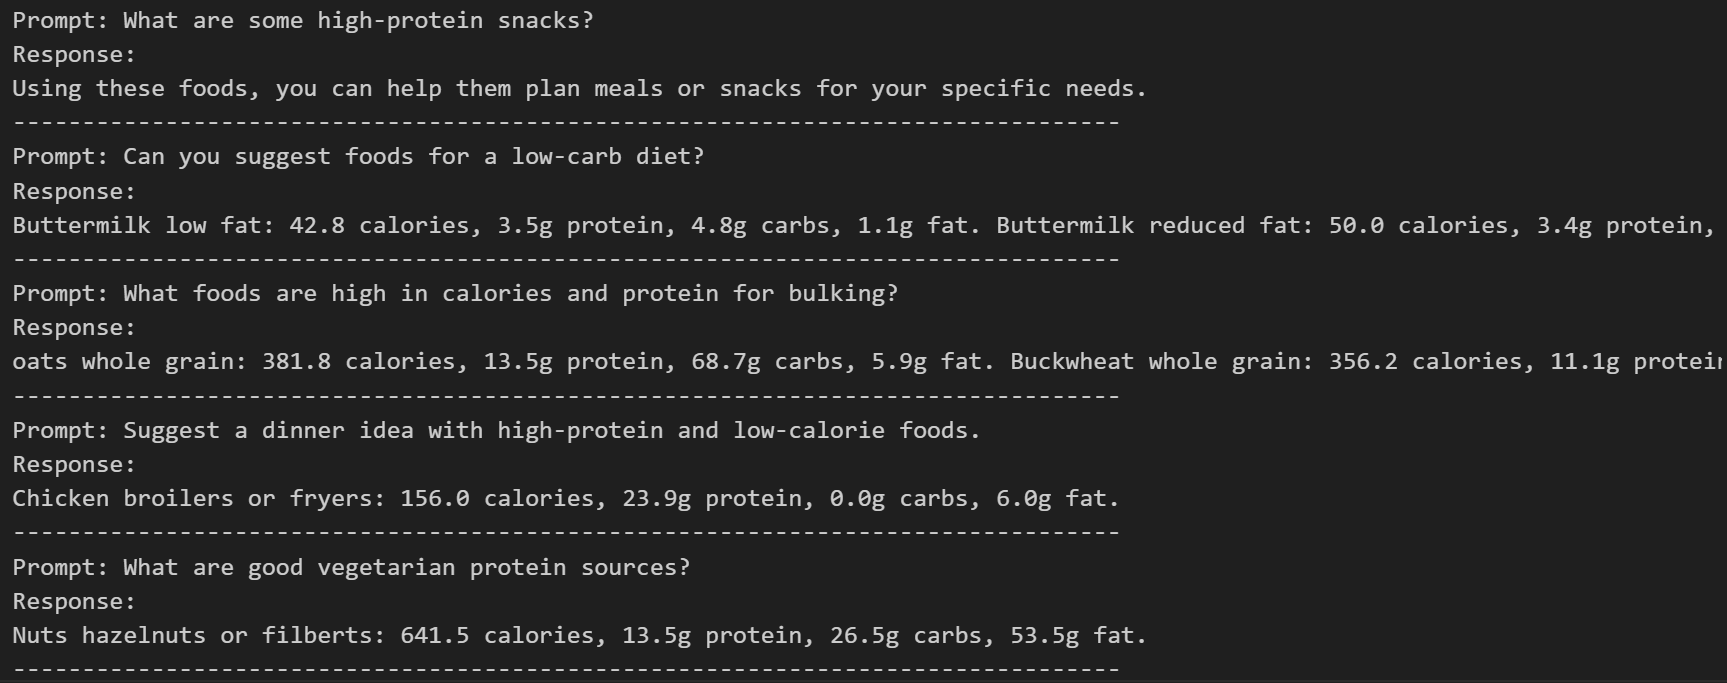